# Annual Income Prediction
By Darshik A S

## 1. Setting Environment

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("notebook")
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
import scipy
import warnings
warnings.filterwarnings('ignore')

## 2. Data Overview

This dataset includes samples of many person who makes over or less than 50K a year.

Listing of attributes:

>50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - - 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

In [5]:
col_names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'class',
]

In [80]:
# Load data in Pandas Dataframe
train_data = pd.read_csv('adult.data.csv',names=col_names)
print(train_data.shape)
train_data.head(2)

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [81]:
# Load data in Pandas Dataframe
test_data = pd.read_csv('adult.test.csv',names=col_names)
print(test_data.shape)
test_data.head(2)

(16282, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.


In [82]:
print(train_data.shape)
print(test_data.shape)

(32561, 15)
(16282, 15)


## 3. Data Preparation

In [83]:
print('COLUMNS'.ljust(18),'TRAIN'.ljust(10),'TEST')
print('-------------------------------------')
for i,j,k in zip(train_data.columns,train_data.dtypes,test_data.dtypes):
    print(i.ljust(18),str(j).ljust(10),k)

COLUMNS            TRAIN      TEST
-------------------------------------
age                int64      object
workclass          object     object
fnlwgt             int64      float64
education          object     object
education_num      int64      float64
marital_status     object     object
occupation         object     object
relationship       object     object
race               object     object
sex                object     object
capital_gain       int64      float64
capital_loss       int64      float64
hours_per_week     int64      float64
native_country     object     object
class              object     object


In [84]:
# Combine both train and train datas
data = pd.concat([train_data,test_data])

In [85]:
# Checking for null values in each attribute
data.isnull().sum(axis=0)

age               0
workclass         1
fnlwgt            1
education         1
education_num     1
marital_status    1
occupation        1
relationship      1
race              1
sex               1
capital_gain      1
capital_loss      1
hours_per_week    1
native_country    1
class             1
dtype: int64

In [86]:
data.dropna(inplace=True)

In [87]:
# Checking for duplicates
data.duplicated().sum()

29

In [88]:
# Remove duplicates
data.drop_duplicates(keep = False, inplace = True)
print(data.shape)

(48785, 15)


In [89]:
data = data.astype({'age': 'int64'})

In [90]:
# Number of unique labels for categorical attribute
print(data.loc[:,data.dtypes == object].nunique(axis=0).sort_values(ascending=False))

native_country    42
education         16
occupation        15
workclass          9
marital_status     7
relationship       6
race               5
class              4
sex                2
dtype: int64


In [91]:
data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [92]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [93]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [94]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [95]:
data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [96]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [97]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [98]:
data['class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [99]:
data['class'].replace({' <=50K.':0,' <=50K':0,' >50K.':1,' >50K':1},inplace=True)
data = data.astype({'class': 'int64'})

In [100]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [101]:
# Checking for missing data
(data == ' ?').sum(axis=0)

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     855
class                0
dtype: int64

In [102]:
# Replacing '?' in attribute with Nan value
data.replace(' ?',inplace=True)

age               None
workclass         None
fnlwgt            None
education         None
education_num     None
marital_status    None
occupation        None
relationship      None
race              None
sex               None
capital_gain      None
capital_loss      None
hours_per_week    None
native_country    None
class             None
dtype: object

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48785.0,38.650835,13.707495,17.0,28.0,37.0,48.0,90.0
fnlwgt,48785.0,189671.809409,105607.385218,12285.0,117555.0,178137.0,237582.0,1490400.0
education_num,48785.0,10.079123,2.569773,1.0,9.0,10.0,12.0,16.0
capital_gain,48785.0,1080.328400,7456.279978,0.0,0.0,0.0,0.0,99999.0
capital_loss,48785.0,87.604551,403.228816,0.0,0.0,0.0,0.0,4356.0
hours_per_week,48785.0,40.427713,12.390337,1.0,40.0,40.0,45.0,99.0
class,48785.0,0.239479,0.426770,0.0,0.0,0.0,0.0,1.0


## 4. Exploratory data analysis

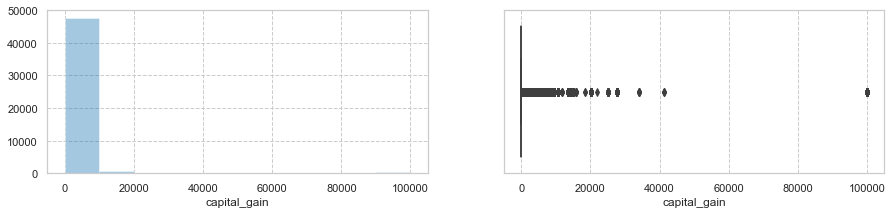

Skewness :  11.887649816488969


In [104]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.distplot(data['capital_gain'],bins=10,kde=False)

plt.subplot(1,2,2)
sns.boxplot(data['capital_gain'])
plt.show()

print('Skewness : ',data['capital_gain'].skew())

In [105]:
data['capital_gain'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
capital_gain,48785.0,1080.3284,7456.279978,0.0,0.0,0.0,0.0,99999.0


Here we can see some samples in capital_gain which are close to 100,000 is very unusual. So we can remove those outliers.  

In [106]:
data['capital_gain'].replace(99999.0,np.nan,inplace=True)
data.dropna(inplace=True)

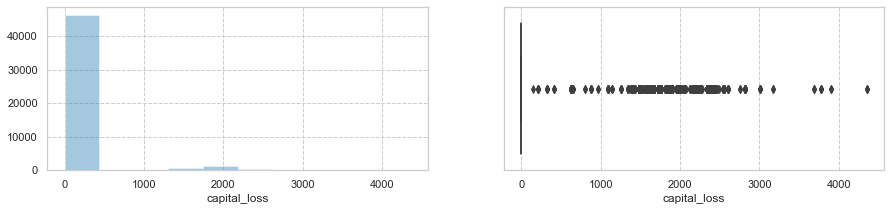

Skewness :  4.553740648792172


In [107]:
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.distplot(data['capital_loss'],bins=10,kde=False)

plt.subplot(1,2,2)
sns.boxplot(data['capital_loss'])
plt.show()

print('Skewness : ',data['capital_loss'].skew())

Here the data has so many outliers which distorts the prediction, therefore we can apply square root transformation to reduce the range

In [108]:
data.skew()

age               0.560563
fnlwgt            1.442096
education_num    -0.320176
capital_gain      5.917095
capital_loss      4.553741
hours_per_week    0.236707
class             1.245742
dtype: float64

In [109]:
data['capital_gain'] = np.sqrt(data['capital_gain'])
data['capital_loss'] = np.sqrt(data['capital_loss'])

In [110]:
data.skew()

age               0.560563
fnlwgt            1.442096
education_num    -0.320176
capital_gain      3.907710
capital_loss      4.351775
hours_per_week    0.236707
class             1.245742
dtype: float64

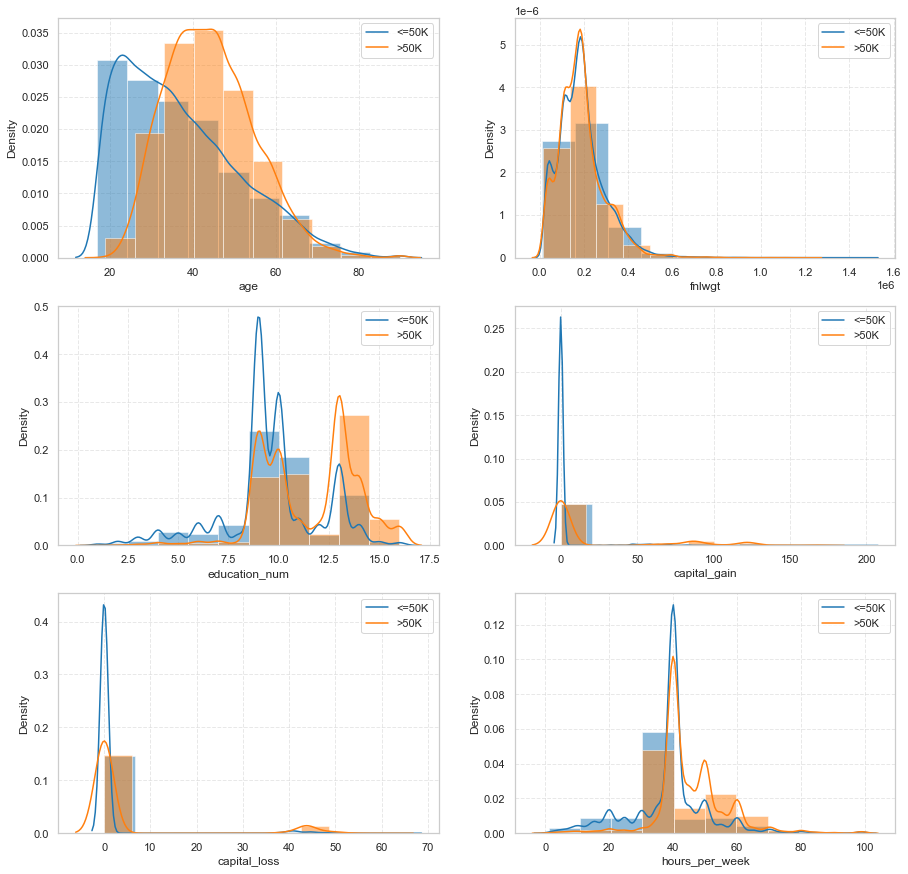

In [111]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.distplot(data[data['class'] == 0]['age'],bins=10,hist_kws={'alpha':0.5})
sns.distplot(data[data['class'] == 1]['age'],bins=10,hist_kws={'alpha':0.5})
plt.grid(alpha=0.45)
plt.legend(['<=50K','>50K'])
plt.subplot(3,2,2)
sns.distplot(data[data['class'] == 0]['fnlwgt'],bins=10,hist_kws={'alpha':0.5})
sns.distplot(data[data['class'] == 1]['fnlwgt'],bins=10,hist_kws={'alpha':0.5})
plt.grid(alpha=0.45)
plt.legend(['<=50K','>50K'])
plt.subplot(3,2,3)
sns.distplot(data[data['class'] == 0]['education_num'],bins=10,hist_kws={'alpha':0.5})
sns.distplot(data[data['class'] == 1]['education_num'],bins=10,hist_kws={'alpha':0.5})
plt.grid(alpha=0.45)
plt.legend(['<=50K','>50K'])
plt.subplot(3,2,4)
sns.distplot(data[data['class'] == 0]['capital_gain'],bins=10,hist_kws={'alpha':0.5})
sns.distplot(data[data['class'] == 1]['capital_gain'],bins=10,hist_kws={'alpha':0.5})
plt.grid(alpha=0.45)
plt.legend(['<=50K','>50K'])
plt.subplot(3,2,5)
sns.distplot(data[data['class'] == 0]['capital_loss'],bins=10,hist_kws={'alpha':0.5})
sns.distplot(data[data['class'] == 1]['capital_loss'],bins=10,hist_kws={'alpha':0.5})
plt.grid(alpha=0.45)
plt.legend(['<=50K','>50K'])
plt.subplot(3,2,6)
sns.distplot(data[data['class'] == 0]['hours_per_week'],bins=10,hist_kws={'alpha':0.5})
sns.distplot(data[data['class'] == 1]['hours_per_week'],bins=10,hist_kws={'alpha':0.5})
plt.grid(alpha=0.45)
plt.legend(['<=50K','>50K'])
plt.show()

* The people who are earning more than 50K are more likely to be older
* People who are having more than 11 years of education tends to get a higher inome
* People who work more than 40 hours per week is more likely to get higher income

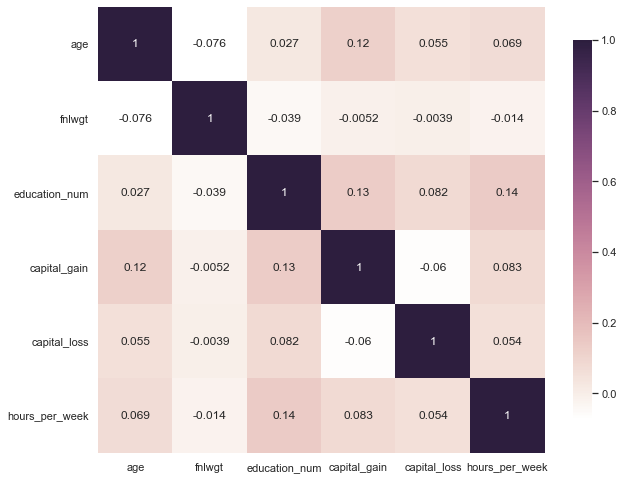

In [114]:
# Numeric variables correlation
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(data.iloc[:,:-1].corr(),square=True, cmap=cmap, cbar_kws={"shrink": .7},annot=True)
plt.show()

There are not much correlation between the independent variables

In [115]:
# Categorical varibales association using cramers V statistic
def cramers_corrected_stat(confusion_matrix):
    chi2, _, _, _ = scipy.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cols = list(pd.concat([data.loc[:,data.dtypes == object],data['class']],axis=1).columns.values)
corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    A, B = data[col1], data[col2]
    idx1, idx2 = cols.index(col1), cols.index(col2)
    dfObserved = pd.crosstab(A,B) 
    corrM[idx1, idx2] = cramers_corrected_stat(dfObserved.values)
    corrM[idx2, idx1] = corrM[idx1, idx2]

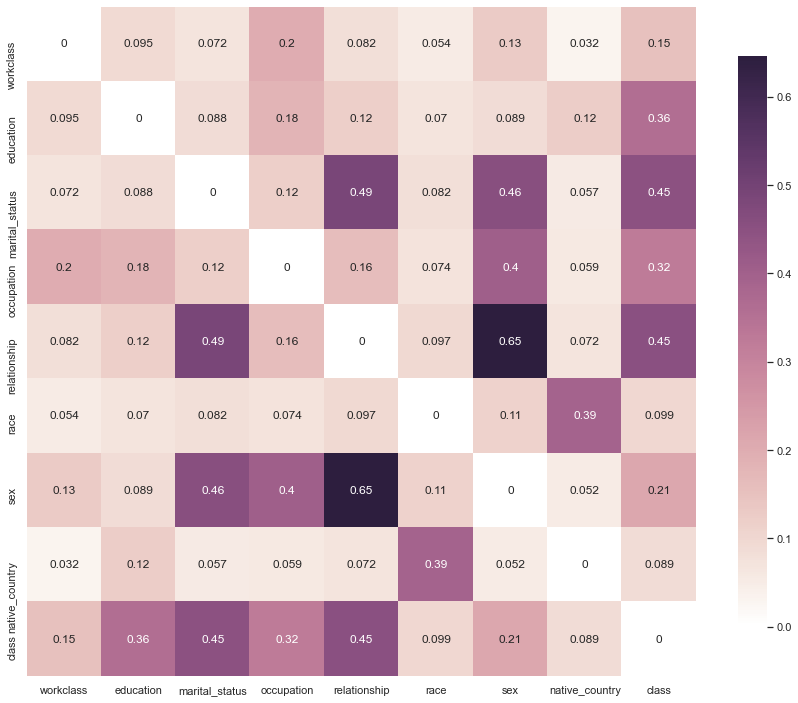

In [116]:
corr = pd.DataFrame(corrM, index=cols, columns=cols)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15, 15))
sns.heatmap(pd.DataFrame(corrM, index=cols, columns=cols), cmap=cmap, square=True, cbar_kws={"shrink": .7}, annot=True)
plt.show()

## 5. Classification

### 5.1 One-Hot-Encoding all the categorical attributes

In [118]:
y = []
for i in data.loc[:,data.dtypes == object].columns:
    y.append(pd.get_dummies(data[i],prefix=i,drop_first=True))

In [123]:
obj_data = pd.concat(y,axis=1)

In [125]:
s = data.loc[:,data.dtypes != object].iloc[:,:-1]
nobj_data = pd.DataFrame(s,columns=data.loc[:,data.dtypes != object].iloc[:,:-1].columns)

In [127]:
data_new = pd.concat([nobj_data,obj_data,data['class']],axis=1)

In [128]:
data_new.shape

(48541, 98)

### 5.2 Spliting dataset into train and test data

In [166]:
x = data_new.iloc[:,:-1]
y = data_new.iloc[:,-1]

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 27)

In [145]:
print(x_train.shape)
print(x_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(33978, 97)
(14563, 97)
0    25983
1     7995
Name: class, dtype: int64
0    11119
1     3444
Name: class, dtype: int64


### 5.3 Applying PCA for dimension reduction

In [157]:
from sklearn.decomposition import PCA

In [171]:
pca = PCA(n_components=10)
x_t = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_t, y, test_size = 0.3, random_state = 27)

### 5.4 Model training and evaluation

In [174]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [175]:
# Accuracy for each different K folds
folds = {}
names = []

for name, model in models:
    results = []
    print(name)
    for i in range(2,11):
        kfold = StratifiedKFold(n_splits=i)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results.mean())
    print('Max Acc is for fold %s: %0.3f' % (str(results.index(max(results))+2),(max(results))))
    folds[name] = results

LR
Max Acc is for fold 10: 0.752
LDA
Max Acc is for fold 3: 0.836
DT
Max Acc is for fold 3: 0.804
KNN
Max Acc is for fold 9: 0.750


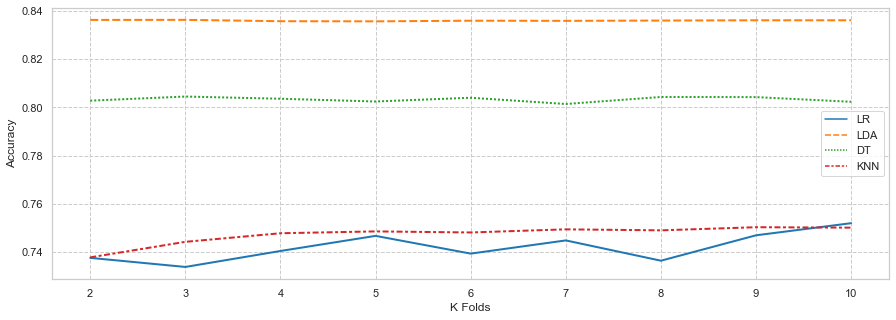

In [176]:
# Plot accuracies for each fold
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=folds,linewidth=2)
ax.set_xticklabels([str(i) for i in range(1,11)])
plt.xlabel('K Folds')
plt.ylabel('Accuracy')
plt.show()

### 6. Prediction using Linear Discriminant Analysis

In [181]:
%%time
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
preditions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  84.10355009270069 

Confusion Matrix : 
 [[10359   760]
 [ 1555  1889]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.87      0.93      0.90     11119
           1       0.71      0.55      0.62      3444

    accuracy                           0.84     14563
   macro avg       0.79      0.74      0.76     14563
weighted avg       0.83      0.84      0.83     14563

Wall time: 164 ms


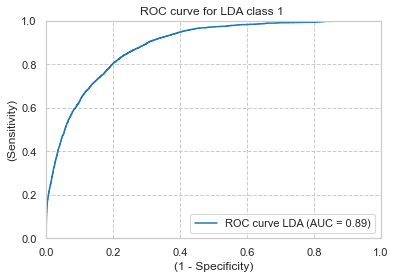

In [182]:
lda_pred_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA class 1 ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()